# Polls and Donors

## Poll Data Set

In this Data Project, we will be looking at data from the 2012 USA election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

  1. Who was being polled and what was their party affiliation?
  2. Did the poll results favor Romney or Obama?
  3. How do undecided voters effect the poll?
  4. Can we account for the undecided voters?
  5. How did voter sentiment change over time?
  6. Can we see an effect in the polls from the debates?
  
The data for the polls will be obtained from HuffPost Pollster. You can check their website [here](http://elections.huffingtonpost.com/pollster).

In [0]:
# data manipulation libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# for timestamps
from datetime import datetime

# for gathering data from the web
import requests

# to work with the csv file
from io import StringIO

sns.set_style('whitegrid')

### Import Data

In [0]:
# url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# use requests to get the information in text form (from CSV to text)
source = requests.get(url).text

# use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)

# set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

### Analyze Data

In [3]:
# data information
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [4]:
# top 10 rows
poll_df.head(10)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


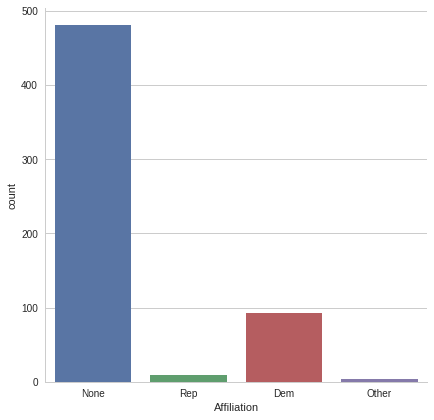

In [5]:
sns.factorplot('Affiliation', data=poll_df, kind='count', size=6)

Looks like we are overall relatively neutral, but still leaning towards **Democratic Affiliation**, it will be good to keep this in mind. Let's see if sorting by the **Population** hue gives us any further insight into the data.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


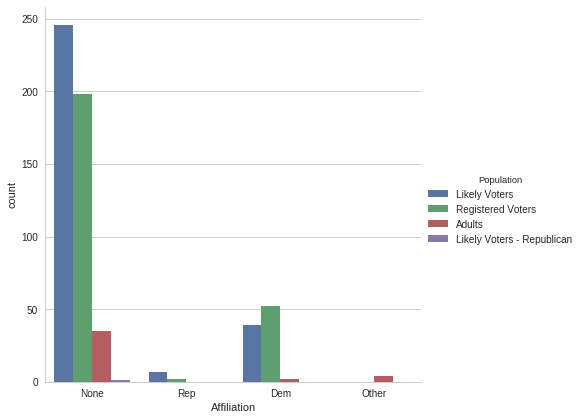

In [6]:
# the affiliation by Population
sns.factorplot('Affiliation', data=poll_df, kind='count', hue='Population', size=6)

Looks like we have a strong showing of **Likely Voters** and **Registered Voters**, so the poll data should hopefully be a good reflection on the populations polled. Let's take another quick overview of the DataFrame.

Let's go ahead and take a look at the averages for Obama, Romney, and the polled people who remained undecided.

In [7]:
poll_df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


In [8]:
avg = pd.DataFrame(poll_df.mean(), columns=['Mean'])
avg

,Mean
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [9]:
std = pd.DataFrame(poll_df.std(), columns=['Standard Deviation'])
std

,Standard Deviation
Number of Observations,1621.268369
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


In [0]:
# drop the Number of Observations' row in both DataFrames
std.drop('Number of Observations', axis=0, inplace=True)
avg.drop('Number of Observations', axis=0, inplace=True)

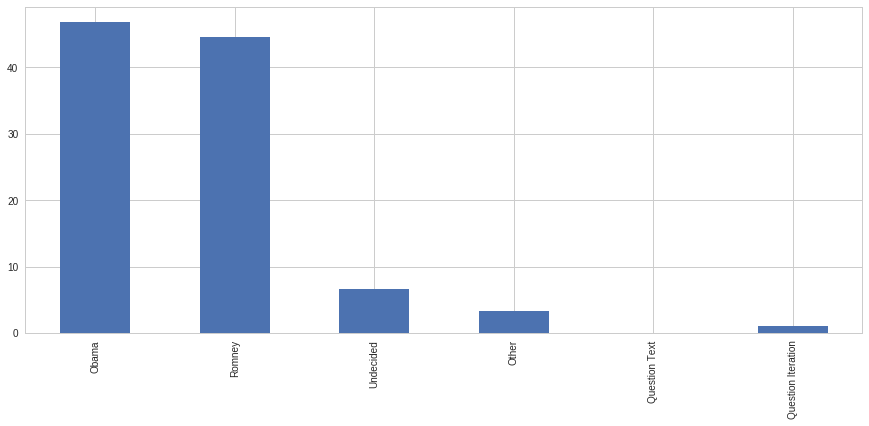

In [11]:
# plot the result by using pandas built-in plot function with kind='bar' and set the y error, yerr='std'
# set the y error ()
avg.plot(yerr=std, kind='bar', legend=False, figsize=(15,6))

This is the average sentiment of all the polls. Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers.

In [12]:
# concatenate the two dataframes (mean and std)
poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Average', 'STD']
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates, the observed difference should be an unbiased estimate of the final difference. If we wanted to, we could also do a quick time series analysis of the voter sentiment by plotting Obama/Romney favor versus the Poll End Dates. Let's take a look at how we could quickly do that in pandas. 

**Note:** The time is in reverse chronological order. Also keep in mind the multiple polls per end date.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


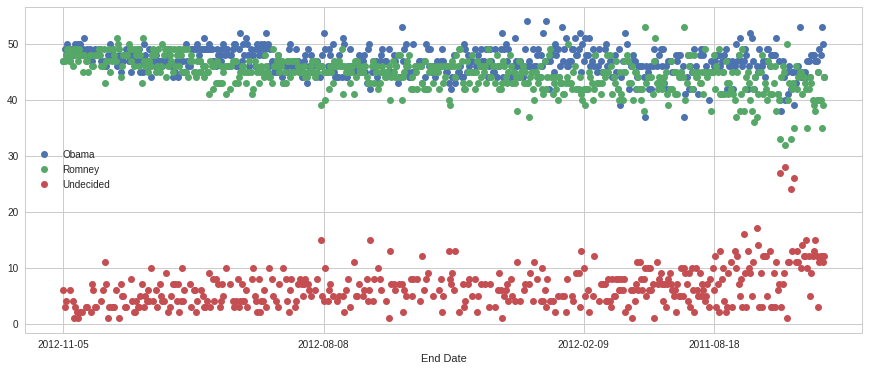

In [13]:
# plot of sentiment in the polls versus time.
poll_df.plot(x='End Date', y=['Obama','Romney','Undecided'], linestyle='', marker='o', figsize=(15,6), xticks=(0,200, 400, 500))

We can see the quick time analysis of voter sentiment for each of the candidates and undecided voters. In the x axis, on the right hand side, there are the earlier dates and on the left hand side are the later dates. Trend of undecided voters starts to go down as you get closer to elections. And the other interesting thing is Obama and Romney are getting closer and closer on the left hand side. While this may give you a quick idea, go ahead and try creating a new DataFrame or editing poll_df to make a better visualization of the above idea. Let's go ahead and plot out the difference between Obama and Romney and how it changes as time moves along.

In [14]:
poll_df[['Obama','Romney']].head(5)

,Obama,Romney
0,47.0,47.0
1,49.0,47.0
2,48.0,48.0
3,50.0,49.0
4,48.0,49.0


In [15]:
poll_df['Difference Percentage'] = (poll_df.Obama - poll_df.Romney) / 100 # percentage points
poll_df[['Obama','Romney','Difference Percentage']].head(5)

,Obama,Romney,Difference Percentage
0,47.0,47.0,0.00
1,49.0,47.0,0.02
2,48.0,48.0,0.00
3,50.0,49.0,0.01
4,48.0,49.0,-0.01


**Positive difference** indicates a leaning towards Obama in the polls.
**Negative difference** indicates a leaning towards Romney in the polls.

Now let's go ahead and see if we can visualize how this sentiment in difference changes over time. We will start by using groupby to group the polls by their start data and then sorting it by that Start Date.

In [16]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_df.head(5)

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference Percentage
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


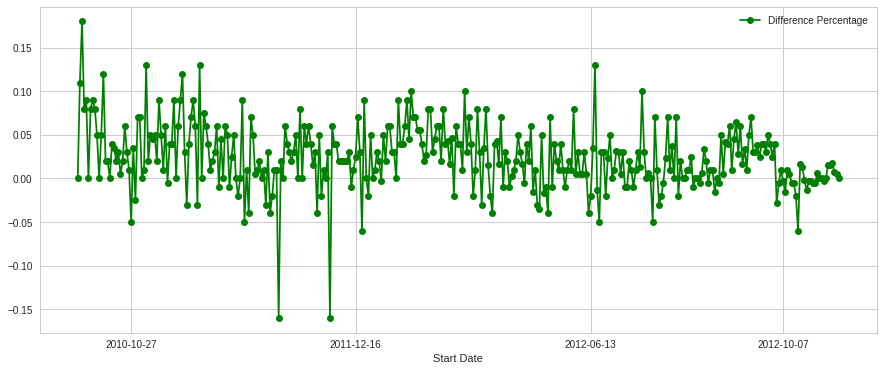

In [17]:
poll_df.plot(x='Start Date', y='Difference Percentage', figsize=(15,6), marker='o', linestyle='-', color='green', xticks=(25,130,240,330))

Looks like Obama was in the lead for most of the year. Because if the difference is minus, then it means Romney was leading. 

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results. The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October. In order to find where to set the x limits for the figure, we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

In [18]:
# set row count and xlimit list
row_in = 0 # row_index
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
min_xlimit = min(xlimit)
max_xlimit = max(xlimit)
print(xlimit)
print(min_xlimit, max_xlimit)

[325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352]
325 352


The debate dates were Oct 3rd, Oct 11th, and Oct 22nd. So, now we are going to plot some lines on top of this plot, and see where we can find the markers of the debates and any chances to the sentiment of voters.

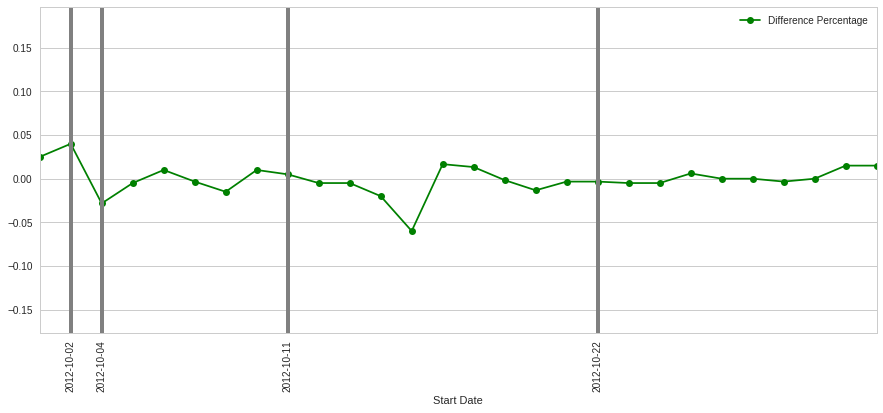

In [19]:
poll_df.plot(x='Start Date', y='Difference Percentage', 
             figsize=(15,6), marker='o', linestyle='-', 
             color='green', xlim=(min_xlimit, max_xlimit),
             xticks=(min_xlimit+1, min_xlimit+2, min_xlimit+8, min_xlimit+18),
             )

plt.xticks(rotation='vertical')

# add the debate markers for Oct 2nd, Oct 4th, Oct 11th and Oct 22nd
# the reason why we plot Oct 2nd and Oct 4th instead of Oct 3rd is the data belonging to the first debate date is not recorded

# Oct 2nd
plt.axvline(min_xlimit+1, linewidth=4, color='grey')

# Oct 4th
plt.axvline(min_xlimit+2, linewidth=4, color='grey')

# Oct 11th
plt.axvline(min_xlimit+8, linewidth=4, color='grey')

# Oct 22nd
plt.axvline(min_xlimit+18, linewidth=4, color='grey')

After the first debate, sentiment for Obama increased, and after the second debate Romney was more favorable, after the third debate every ones were pretty even.

For all these polls, it is important to remember how geographical location can effect the value of a poll in predicting the outcomes of a national election.

## Donor Data Set

Let's take a look at a data set consisting of information on donations to the federal campaign. You can download it [here](https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0).

The questions we will be trying to answer while looking at this data set is:

    1. How much was donated and what was the average donation?
    2. How did the donations differ between candidates?
    3. How did the donations differ between Democrats and Republicans?
    4. What were the demographics of the donors?
    5. Is there a pattern to donation amounts?

In [22]:
"""from google.colab import files
uploaded = files.upload()"""

Saving Election_Donor_Data.csv to Election_Donor_Data.csv


In [23]:
donor_df = pd.read_csv('Election_Donor_Data.csv', low_memory=False)
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [24]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


Get a quick glimpse of the donation amounts, and the average donation amount

In [25]:
# contb_receipt_amt -> contributor receipt amount
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

**value_counts** basically counts how many times each unique value occurs. This means most common donation was 100$ donation. 178188 people donate 100 dolars. In total, there are 8079 different amounts. 

In [26]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print('The average donation was %.2f with a std of %.2f' %(don_mean, don_std))

The average donation was 298.24 with a std of 3749.67


**3749.67** is a huge standard deviation. Let's see if there are any large donations or other factors messing with the distribution of the donations.

In [27]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(ascending=True)

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

Looks like we have some negative values, as well as some huge donation amounts. The negative values are due to the FEC (Federal Election Commission) recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts.

In [28]:
# get rid of the negative values
top_donor = top_donor[top_donor > 0]
top_donor.sort_values(ascending=True).value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

10 most common donations ranged from 10 to 2500 dollars. A quick question we could verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100,500 etc.) We can quickly visualize this by making a histogram and checking for peaks at those values. Let's go ahead and do this for the most common amounts, up to 2500 dollars.

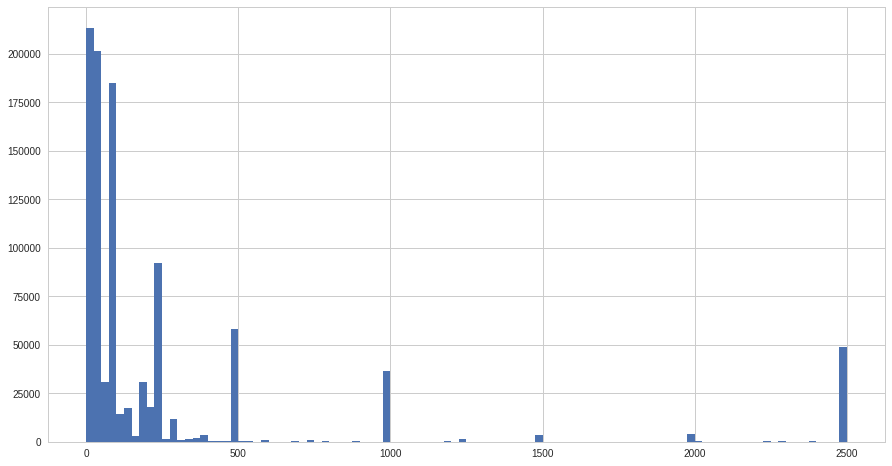

In [29]:
com_don = top_donor[top_donor <= 2500]
com_don.hist(bins=100, figsize=(15,8))

Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates.

In [30]:
# grab the unique object from the candidate column
# cand_nm -> candidate name
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [0]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [32]:
donor_df[['cand_nm','Party']][1:1001731:100000]

,cand_nm,Party
1,"Bachmann, Michelle",Republican
100001,"Romney, Mitt",Republican
200001,"Obama, Barack",Democrat
300001,"Obama, Barack",Democrat
400001,"Obama, Barack",Democrat
500001,"Obama, Barack",Democrat
600001,"Obama, Barack",Democrat
700001,"Obama, Barack",Democrat
800001,"Paul, Ron",Republican
900001,"Santorum, Rick",Republican


Let's look at our DataFrame and also make sure we clear refunds from the contribution amounts.

In [33]:
# contb_receipt_amt -> contribution receipt amount
# clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. First we will look at the total number of donations and then at the total amount.

In [34]:
# Group dataframe by candidate name and then display contb_receipt_amt column
# and count the total number of contribution
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Obama is the front-runner in number of people donating, since he is not competeing with any other democratic nominees. Let's take a look at the total dollar amounts.

The candidate Bachmann, Michelle raised 2711439 dollars 
The candidate Cain, Herman raised 7101082 dollars 
The candidate Gingrich, Newt raised 12832770 dollars 
The candidate Huntsman, Jon raised 3330373 dollars 
The candidate Johnson, Gary Earl raised 566962 dollars 
The candidate McCotter, Thaddeus G raised 39030 dollars 
The candidate Obama, Barack raised 135877427 dollars 
The candidate Paul, Ron raised 21009620 dollars 
The candidate Pawlenty, Timothy raised 6004819 dollars 
The candidate Perry, Rick raised 20305754 dollars 
The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 
The candidate Romney, Mitt raised 88335908 dollars 
The candidate Santorum, Rick raised 11043159 dollars 


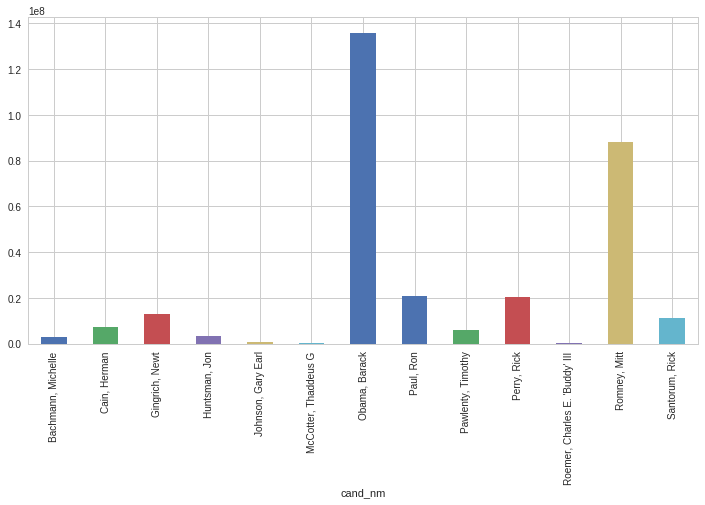

In [35]:
# sum of all the contribution amounts
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# index tracker
i = 0

for don in cand_amount:
    print("The candidate %s raised %.0f dollars " %(cand_amount.index[i], don))
    i += 1
    
cand_amount.plot(kind='bar', figsize=(12,6))

In [36]:
donor_df.groupby('Party')['contb_receipt_amt'].sum()

Party
Democrat      1.358774e+08
Republican    1.736539e+08
Name: contb_receipt_amt, dtype: float64

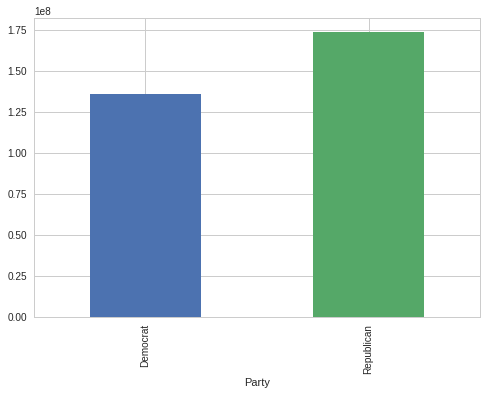

In [37]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Looks like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates.

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the dono_df DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). FInally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the contributions by anyone with the same profession.

In [38]:
# use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                      index='contbr_occupation',
                                      columns='Party', aggfunc='sum')
occupation_df.head(5)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [39]:
occupation_df.shape

(45067, 2)

There is over 45000 reported different occupations between all the donors. This is probably far too large to display effectively with a small, static visualization. What we should do is have a cut-off for total contribution amounts. Afterall, small donations of 20 dollars by one type of occupation won't give us too much insight. So let's set our cut off at 1 million dollars.

In [40]:
occupation_df.tail(5)

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


Since after all, a 35$ contribution by the zoo keeper isn't gonna have a big effect in the large scope of the campaign. So, we are gonna set a cut-off point at 1 milllion dollars of sum contributions.

In [41]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.shape

(31, 2)

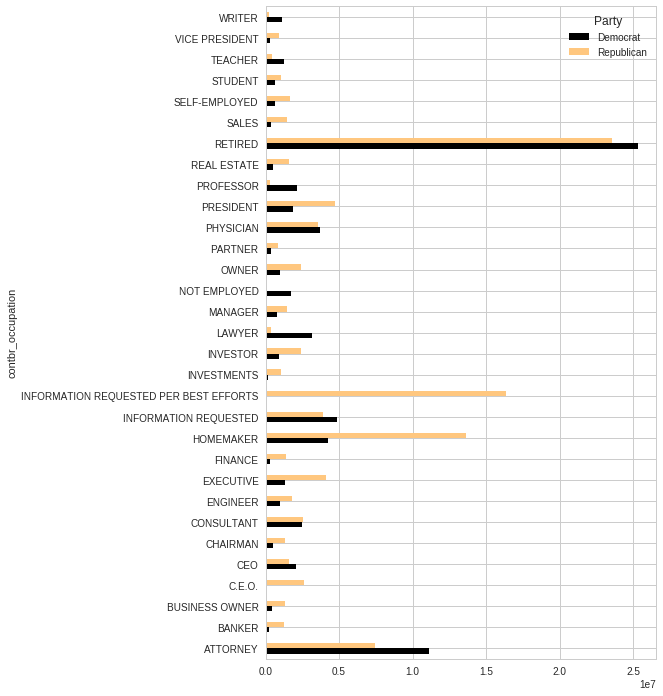

In [42]:
# cmap -> colormap
# barh -> horizontal plot
occupation_df.plot(kind='barh', figsize=(7,12), cmap='copper')

Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

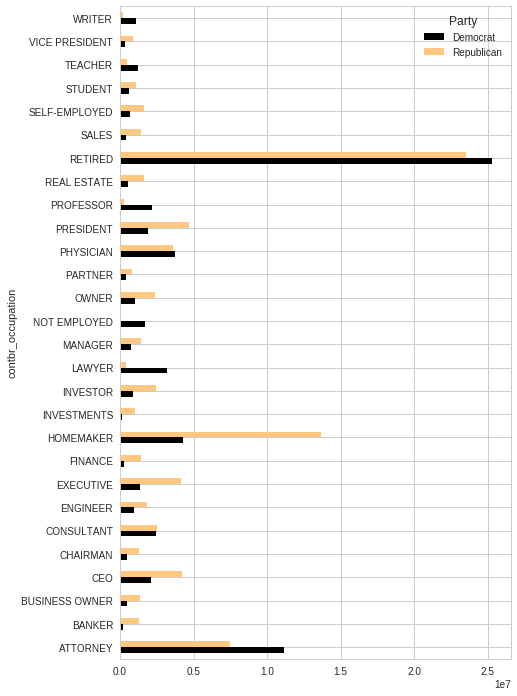

In [43]:
# drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'], axis=0, inplace=True)

# sets new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace=True)

occupation_df.plot(kind='barh', figsize=(7,12), cmap='copper')

Looks like CEOs are a little more conservative leaning, this may be due to the tax philosophies of each party during the election.